# DATA MODELING

## Inserting required libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

## Saving data as csv and converting to dataframe

In [2]:
df = pd.read_csv(r"C:\Users\amirt\OneDrive\Documents\Projects\ML-projects\Data\UCI_Credit_Card.csv")

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
### Dropping and renaming the columns

In [5]:
df = df.drop(["ID"],axis = 1)
df.rename(columns={'default.payment.next.month': 'def_pay'}, inplace=True)

#### Separating to categorical and numerical

In [6]:
cat_list = [feature for feature in df.columns if len(df[feature].unique()) <12]
num_list = [feature for feature in df.columns if feature not in cat_list]
print("There are",len(cat_list)," categorical features of df are ", cat_list)
print("There are",len(num_list),"numerical features of df are ", num_list)

There are 10  categorical features of df are  ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'def_pay']
There are 14 numerical features of df are  ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


### Feature Engineering

In [7]:
df.loc[df['EDUCATION'].isin([0, 4, 5, 6]), 'EDUCATION'] = 0

In [8]:
# Convert the selected categorical columns to object type
df[cat_list] = df[cat_list].astype('object')
df["def_pay"] = df["def_pay"].astype("int64")

In [9]:
df['total_bill_amt'] = df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].sum(axis=1)
df['total_pay_amount'] = df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].sum(axis=1)


In [10]:
df['total_payment_delay'] = df['PAY_0'] + df['PAY_2'] + df['PAY_3'] + df['PAY_4'] + df['PAY_5'] + df['PAY_6']
df.drop(['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6','PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'
], axis=1, inplace=True)


Lets create a new feature total_bill_amt and total_pay_amount so that it will be user friendly

In [11]:
## df after feature engineering
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,def_pay,total_bill_amt,total_pay_amount,total_payment_delay
0,20000.0,2,2,1,24,1,7704.0,689.0,-2
1,120000.0,2,2,2,26,1,17077.0,5000.0,3
2,90000.0,2,2,2,34,0,101653.0,11018.0,0
3,50000.0,2,2,1,37,0,231334.0,8388.0,0
4,50000.0,1,2,1,57,0,109339.0,59049.0,-2


### Importing algorithms

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [13]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
X = df.drop('def_pay',axis=1)
y= df['def_pay']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assuming X is the feature matrix and y is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

It is always good practice to encode and scale after spliting as train and test

### Encoding

In [16]:
# Perform label encoding on categorical variables
label_encoder = LabelEncoder()
X_train['EDUCATION'] = label_encoder.fit_transform(X_train['EDUCATION'])
X_test['EDUCATION'] = label_encoder.transform(X_test['EDUCATION'])

X_train = pd.get_dummies(X_train, columns=['SEX', 'MARRIAGE'],dtype=int)
X_test = pd.get_dummies(X_test, columns=['SEX', 'MARRIAGE'],dtype=int)

<br> Since, sex and marriage is nominal, we use one hot encoding usind get_dummies function.</br> 
We use label encoding for education as it is ordinal

### Scaling

In [17]:
# Scale the numeric columns using StandardScaler
scaler = StandardScaler()
columns_to_scale = ['total_bill_amt', 'total_pay_amount', 'total_payment_delay', 'LIMIT_BAL']
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

# Print the preprocessed train and test sets
print("X_train:\n", X_train.head())
print("\nX_test:\n", X_test.head())
print("\ny_train:\n", y_train.head())
print("\ny_test:\n", y_test.head())


X_train:
        LIMIT_BAL  EDUCATION  AGE  total_bill_amt  total_pay_amount   
21753  -0.672359          2   24        0.304560         -0.279159  \
251    -1.057768          2   28       -0.352884         -0.375544   
22941   0.098459          0   44       -0.607355         -0.213920   
618    -0.826523          1   25        0.001265         -0.323841   
17090  -0.286950          2   25        1.144973          0.035674   

       total_payment_delay  SEX_1  SEX_2  MARRIAGE_0  MARRIAGE_1  MARRIAGE_2   
21753             0.185020      0      1           0           0           1  \
251               0.185020      1      0           0           0           1   
22941            -0.493616      0      1           0           1           0   
618               0.185020      1      0           0           0           1   
17090             0.185020      0      1           0           0           1   

       MARRIAGE_3  
21753           0  
251             0  
22941           0  
618     

### Correlation

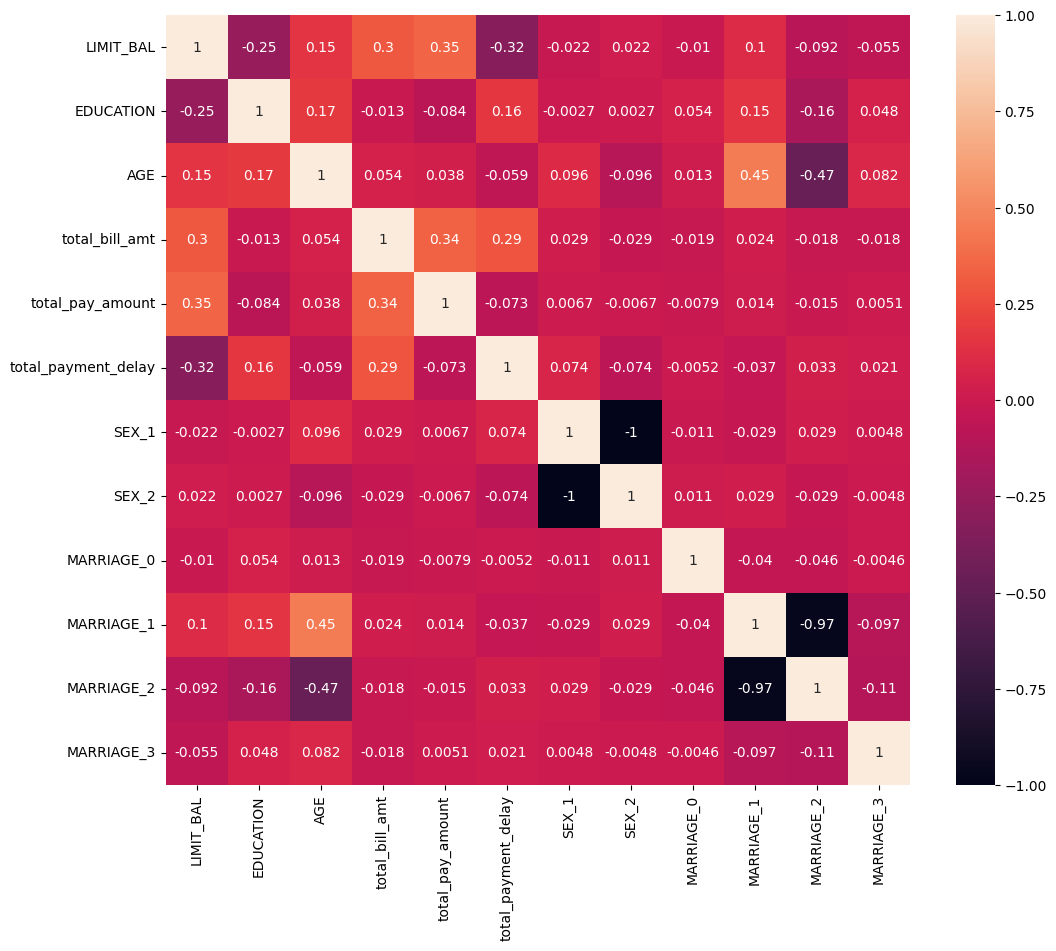

In [18]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
plt.show()

## Modeling

### 1. Logistic Regression

In [19]:
# Import Logistic Regression to Train from SKlearn
loreg = LogisticRegression(max_iter=200)
loreg.fit(X_train,y_train)
loreg_pred = loreg.predict(X_test)
score = accuracy_score(y_test,loreg_pred)
cr = classification_report(y_test,loreg_pred)

print("Logistic Regression")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Logistic Regression
Accuracy Score value: 0.7955
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      4687
           1       0.64      0.15      0.24      1313

    accuracy                           0.80      6000
   macro avg       0.72      0.56      0.56      6000
weighted avg       0.77      0.80      0.74      6000



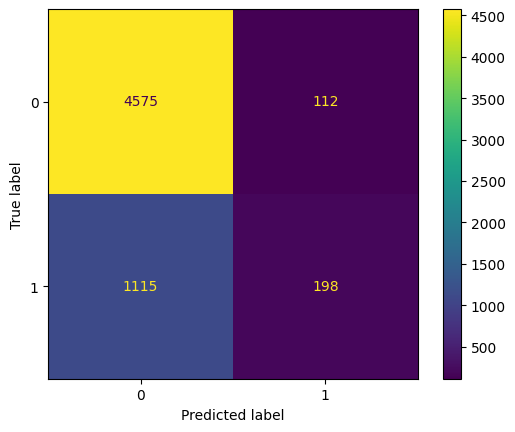

In [20]:
loreg_cm = ConfusionMatrixDisplay.from_estimator(loreg, X_test, y_test)

### 2. Decision Tree

In [21]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_pred = dtc.predict(X_test)
score = accuracy_score(y_test,dtc_pred)
cr = classification_report(y_test,dtc_pred)

print("Decision Tree")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Decision Tree
Accuracy Score value: 0.7085
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4687
           1       0.35      0.38      0.36      1313

    accuracy                           0.71      6000
   macro avg       0.58      0.59      0.59      6000
weighted avg       0.72      0.71      0.71      6000



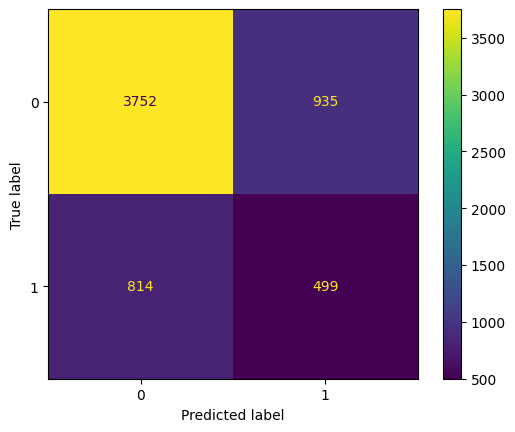

In [22]:
dtc_cm = ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)

### 3. Random Forest classifier

In [23]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)
score = accuracy_score(y_test,rfc_pred)
cr = classification_report(y_test,rfc_pred)

print("Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

Random Forest
Accuracy Score value: 0.7953
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4687
           1       0.56      0.31      0.40      1313

    accuracy                           0.80      6000
   macro avg       0.69      0.62      0.64      6000
weighted avg       0.77      0.80      0.77      6000



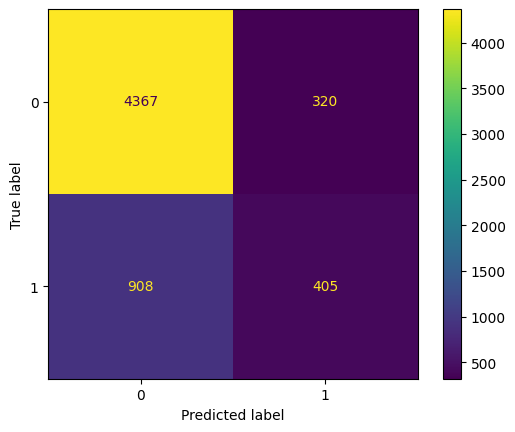

In [24]:
rfc_cm = ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test)

### 4. KNN

In [25]:
# Instantiate KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_pred = knn.predict(X_test)

# Compute the accuracy score
score = accuracy_score(y_test, knn_pred)

# Compute the classification report
cr = classification_report(y_test, knn_pred)

# Print the results
print("K-Nearest Neighbors")
print("Accuracy Score value: {:.4f}".format(score))
print(cr)

K-Nearest Neighbors
Accuracy Score value: 0.7797
              precision    recall  f1-score   support

           0       0.82      0.93      0.87      4687
           1       0.49      0.26      0.34      1313

    accuracy                           0.78      6000
   macro avg       0.66      0.59      0.60      6000
weighted avg       0.75      0.78      0.75      6000



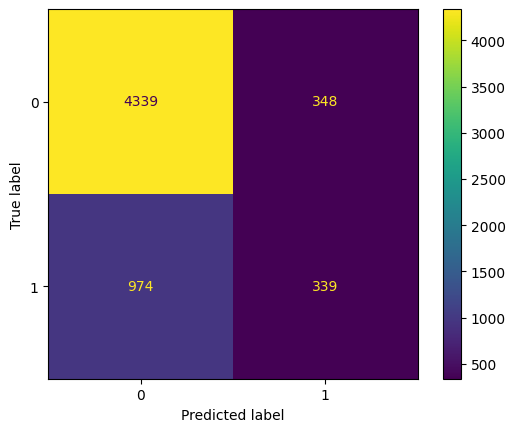

In [26]:
knn_cm = ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

### 4. XGBoost

In [27]:
import xgboost as xgb
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred = xgb.predict(X_test)
score = accuracy_score(y_test, xgb_pred)
cr = classification_report(y_test, xgb_pred)

print("XGboost Classifier")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

XGboost Classifier
Accuracy Score value: 0.8013
              precision    recall  f1-score   support

           0       0.83      0.93      0.88      4687
           1       0.58      0.33      0.42      1313

    accuracy                           0.80      6000
   macro avg       0.71      0.63      0.65      6000
weighted avg       0.78      0.80      0.78      6000



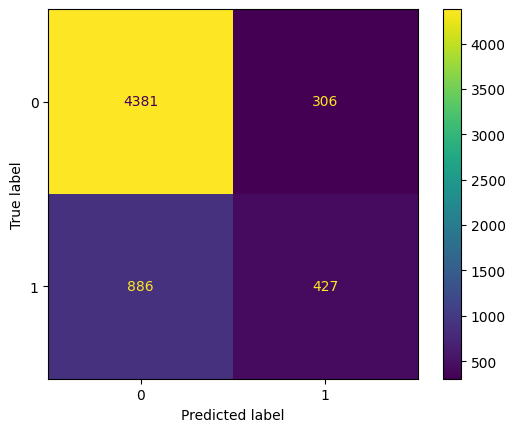

In [28]:
xgb_cm = ConfusionMatrixDisplay.from_estimator(xgb, X_test, y_test)

### Model Accuracy Table

<table>
  <tr>
    <th>Model</th>
    <th>Accuracy Score</th>
  </tr>
  <tr>
    <td>Logistic regression</td>
    <td>79.55%</td>
  </tr>
  <tr>
    <td>Decision Tree Classifier</td>
    <td>71.02%</td>
  </tr>
  <tr>
    <td>Random forest classifier</td>
    <td>79.02%</td>
  </tr>
  <tr>
    <td>KNeighbors Classifier</td>
    <td>77.97%</td>
  </tr>
  <tr>
    <td>Xgboost classifier</td>
    <td>80.13%</td>
  </tr>
</table>


### Hyperparameter Tuning

#### XGBClassifier Tuning

In [29]:
params={
 "learning_rate"    : (np.linspace(0,10, 100)) ,
 "max_depth"        : (np.linspace(1,50, 25,dtype=int)),
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.1, 0.2 , 0.3, 0.4],
 "colsample_bytree" : [0.3, 0.4, 0.5 , 0.7]}
Random_xgb = RandomizedSearchCV(xgb, params, cv = 10,n_jobs = -1)
Random_xgb.fit(X_train, y_train).best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.20202020202020202,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
best_xgb = Random_xgb.best_estimator_
best_xgb.score(X_test,y_test)
bestxgb_pred = best_xgb.predict(X_test)
cr = classification_report(y_test,bestxgb_pred)
print("FINAL XGB")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL XGB
Accuracy Score value: 0.8013
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      4687
           1       0.53      0.31      0.39      1313

    accuracy                           0.79      6000
   macro avg       0.68      0.62      0.63      6000
weighted avg       0.76      0.79      0.77      6000



#### 2. Decision Tree Tuning

In [31]:
params = {
    "n_estimators" : [90,100,115,130],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'max_features' : ['auto','log2']
}
random_rf = RandomizedSearchCV(rfc, params, cv = 10,n_jobs = -1)
random_rf.fit(X_train, y_train).best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, max_features='log2',
                       min_samples_leaf=2, min_samples_split=8,
                       n_estimators=130)

In [33]:
best_rf = random_rf.best_estimator_
best_rf.score(X_test,y_test)
bestrf_pred = best_rf.predict(X_test)
cr = classification_report(y_test,bestrf_pred)
print("FINAL Random Forest")
print ("Accuracy Score value: {:.4f}".format(score))
print (cr)

FINAL Random Forest
Accuracy Score value: 0.8013
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4687
           1       0.63      0.29      0.40      1313

    accuracy                           0.81      6000
   macro avg       0.73      0.62      0.64      6000
weighted avg       0.78      0.81      0.78      6000



#### Applying Stratified Kfold Cross-Validation to know the exact Mean CV Accuracy Score for all models

In [34]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
skfold = StratifiedKFold(n_splits= 10,shuffle= True,random_state= 36)

In [35]:
cv_lg=cross_val_score(loreg,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score Logistic Regression {:.4f}'.format(cv_lg))

CV Score Logistic Regression 0.7807


In [36]:
cv_dt =cross_val_score(dtc,X,y,cv= skfold,scoring="accuracy").mean()
print('CV Score Decision Tree {:.4f}'.format(cv_dt))

CV Score Decision Tree 0.7175


In [37]:
cv_knn =cross_val_score(knn,X,y,cv=skfold,scoring="accuracy").mean()
print('CV Score KNN Classifier {:.4f}'.format(cv_knn))

CV Score KNN Classifier 0.7466


In [41]:
# Predict the first row
first_row = X_test.iloc[[0]]  # Assuming X is a pandas DataFrame
prediction = best_xgb.predict(first_row)


In [42]:
prediction

array([0])

## Compressing to pickle file to build web application

In [38]:
import pickle

In [43]:
pickle.dump(best_xgb,open('classification.pkl','wb'))

In [44]:
pickled_model=pickle.load(open('classification.pkl','rb'))

In [45]:
## Prediction
pickled_model.predict(first_row)

array([0])